In [27]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

In [28]:
import numpy as np

def gradient_descent_vec(x, y, w, b, alpha, num_iters):
    m = x.shape[0]
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        f_wb = w * x + b
        cost = np.sum((f_wb - y) ** 2)
        total_cost = 1 / (2 * m) * cost
        
        gradient = (1 / m) * np.sum((f_wb - y) * x, axis=0)
        w -= alpha * gradient
        b -= alpha * np.mean(f_wb - y)
        
        J_history.append(total_cost)
        p_history.append([w, b])
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]}", f"w: {w}, b: {b}")
    
    return w, b, J_history, p_history

##### Read Data Set: House Pricing from Kaggle

https://www.kaggle.com/code/emrearslan123/house-price-prediction/notebook

In [29]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [30]:
selected_df = df[['TotalBsmtSF', 'SalePrice']]  # A plot of TotalBsmtSF: Total square feet of basement area vs SalePrice

Text(0, 0.5, 'SalePrice')

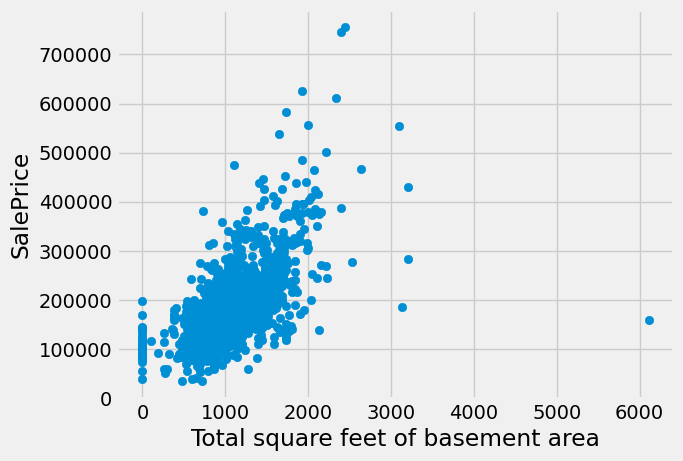

In [31]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.xlabel('Total square feet of basement area')
plt.ylabel('SalePrice')

In [32]:
N = len(selected_df)
N

1460

In [33]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N * 0.8)]

# Uses the remaining indices for validation
val_idx = idx[int(N * 0.8):]

# Split the data into training and validation sets using selected_df
X_train, y_train = selected_df.loc[train_idx, "TotalBsmtSF"], selected_df.loc[train_idx, "SalePrice"]
X_val, y_val = selected_df.loc[val_idx, "TotalBsmtSF"], selected_df.loc[val_idx, "SalePrice"]

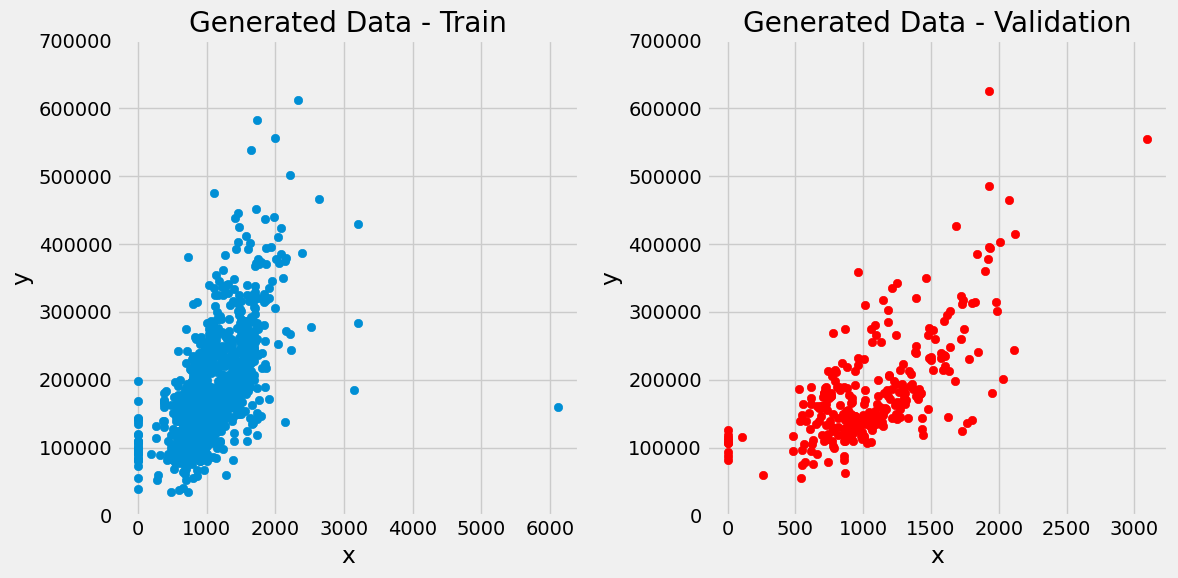

In [34]:
from plots import *
plot_train_test(X_train,y_train,X_val,y_val)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
type(X_train)

(1168,)
(1168,)
(292,)
(292,)


pandas.core.series.Series

In [36]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 50000
tmp_alpha = 1e-10
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent_vec(X_train ,y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 19176900847.67123 w: 0.02097366923501712, b: 1.79938e-05
Iteration 5000: Cost 6882690382.551779 w: 77.07519626525256, b: 0.06747779191932911
Iteration 10000: Cost 3542232059.846355 w: 117.24032158854352, b: 0.10508426250699691
Iteration 15000: Cost 2634596536.8603373 w: 138.17671112006133, b: 0.12712944814438001
Iteration 20000: Cost 2387982972.12105 w: 149.08996895453012, b: 0.141063189869614
Iteration 25000: Cost 2320975595.4423165 w: 154.77858955312792, b: 0.15076877666518215
Iteration 30000: Cost 2302768992.1527004 w: 157.7438263759288, b: 0.15827040384535931
Iteration 35000: Cost 2297822040.488094 w: 159.28947771260962, b: 0.16462319934134392
Iteration 40000: Cost 2296477866.996996 w: 160.09515880701065, b: 0.1703771569918443
Iteration 45000: Cost 2296112603.882632 w: 160.51512451842325, b: 0.17581896546623818
(w,b) found by gradient descent: (160.73400195488017,0.18109701799345748)


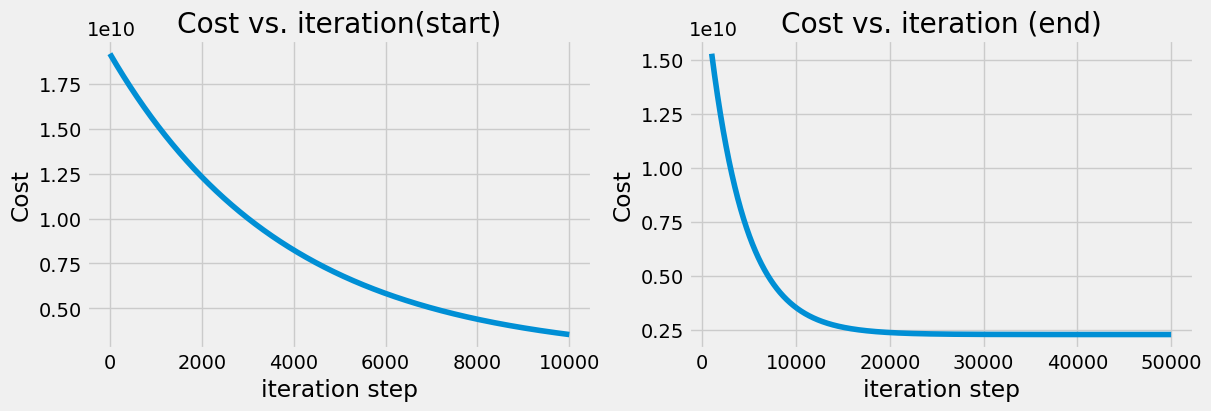

In [37]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Text(0.5, 0, 'x')

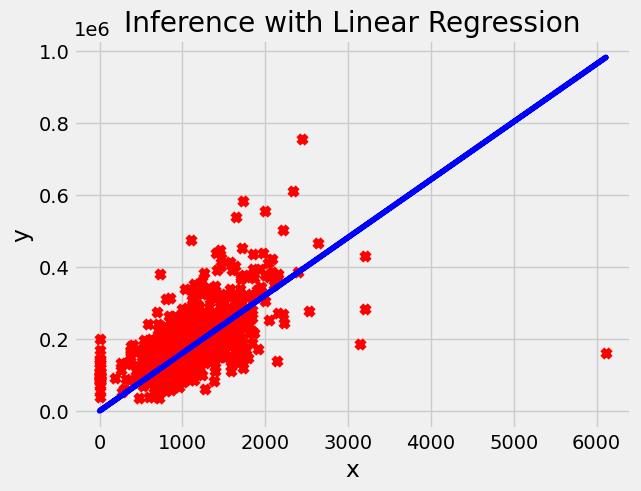

In [38]:
predicted = w_final * X_train + b_final

# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

## Model Metric

#### ----------Linear Regresson-----------

In [39]:
X_train_new = X_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape X_train
y_train_new = y_train.values.reshape(-1) 
X_val_new = X_val.values.reshape(-1, 1)
y_val_new = y_val.values.reshape(-1)

In [40]:
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train_new)
lr_predictions = lr_model.predict(X_val_new)
lr_time = time.time() - start_time
lr_r2_score = r2_score(y_val, lr_predictions)

In [41]:
print("scikit-learn LinearRegression:")
print(f"Time taken: {lr_time} seconds")
print(f"R2 Score: {lr_r2_score}")

scikit-learn LinearRegression:
Time taken: 0.0 seconds
R2 Score: 0.45130884622013046


##### --------------Custom Gradiant---------------

In [42]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 50000
tmp_alpha = 1e-10
start_time = time.time()
w_final, b_final, J_hist, p_hist = gradient_descent_vec(X_train ,y_train, w_init, b_init, tmp_alpha, iterations)
custom_predictions = np.dot(X_val, w_final) + b_final
custom_time = time.time() - start_time
custom_r2_score = r2_score(y_val, custom_predictions)

Iteration    0: Cost 19176900847.67123 w: 0.02097366923501712, b: 1.79938e-05
Iteration 5000: Cost 6882690382.551779 w: 77.07519626525256, b: 0.06747779191932911
Iteration 10000: Cost 3542232059.846355 w: 117.24032158854352, b: 0.10508426250699691
Iteration 15000: Cost 2634596536.8603373 w: 138.17671112006133, b: 0.12712944814438001
Iteration 20000: Cost 2387982972.12105 w: 149.08996895453012, b: 0.141063189869614
Iteration 25000: Cost 2320975595.4423165 w: 154.77858955312792, b: 0.15076877666518215
Iteration 30000: Cost 2302768992.1527004 w: 157.7438263759288, b: 0.15827040384535931
Iteration 35000: Cost 2297822040.488094 w: 159.28947771260962, b: 0.16462319934134392
Iteration 40000: Cost 2296477866.996996 w: 160.09515880701065, b: 0.1703771569918443
Iteration 45000: Cost 2296112603.882632 w: 160.51512451842325, b: 0.17581896546623818


In [43]:
print("\nCustom Gradient Descent:")
print(f"Time taken: {custom_time} seconds")
print(f"R2 Score: {custom_r2_score}")


Custom Gradient Descent:
Time taken: 30.048282384872437 seconds
R2 Score: 0.43992653061878717


#### ----------Final Comparision-------------

In [44]:
from tabulate import tabulate

table = [["Method", "Time taken (seconds)", "R2 Score"],
         ["scikit-learn LinearRegression", lr_time, lr_r2_score],
         ["Custom Gradient Descent", custom_time, custom_r2_score]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════════════════════╤════════════════════════╤════════════╕
│ Method                        │   Time taken (seconds) │   R2 Score │
╞═══════════════════════════════╪════════════════════════╪════════════╡
│ scikit-learn LinearRegression │                 0      │   0.451309 │
├───────────────────────────────┼────────────────────────┼────────────┤
│ Custom Gradient Descent       │                30.0483 │   0.439927 │
╘═══════════════════════════════╧════════════════════════╧════════════╛
